In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering

In [77]:
# Load a dataset
df = pd.read_csv('IranianTelecom_Classification.csv')
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [79]:
print(df.shape)
df.columns

(3150, 14)


Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

## Data Understanding & Exploration

### Missing Values

In [80]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64


### Summery Statistics

In [81]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


### Identify Categorial and Numerical Features

In [82]:
categorical_features= [ "charge_rank", "age_rank", "tariff_plan", "tenure_group", "complaint_flag", "active_status"]
numerical_features = [ "failure_calls_total", "customer_ltv", "call_total_seconds", "calls_total", "sms_total", "distinct_called_no_total"]
target = "churn"

## Data Cleaning & Preprocessing

### Updating Column Names for consistency

In [83]:
# Rename columns names to be more descriptive and readable

df = df.rename(columns={"Call  Failure" : "Failure_Calls_Total",
                        "Complains" : "Complaint_Flag",
                        "Subscription  Length": "Tenure",
                        "Charge  Amount" : "Charge_Rank",
                        "Seconds of Use" : "Call_Total_Seconds",
                        "Frequency of use" : "Calls_Total" ,
                        "Frequency of SMS" : "SMS_Total",
                        "Distinct Called Numbers" : "Distinct_Called_No_Total",
                        "Age Group" : "Age_Rank",
                        "Tariff Plan" : "Tariff_Plan",
                        "Status" : "Active_Status",
                        "Age" : "Age_Customer",
                        "Customer Value" : "Customer_LTV"
               })

### Removing duiplicate rows

In [84]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 300


In [85]:
df = df.drop_duplicates()

In [86]:
print(df.shape)

(2850, 14)


### Fix Inconsistent Data Entries

In [87]:
# Loop through columns to get unique values from all columns
for column in df.columns:
    unique_values = sorted(df[column].unique(), reverse=False)
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Failure_Calls_Total': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
Unique values in column 'Complaint_Flag': [0, 1]
Unique values in column 'Tenure': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
Unique values in column 'Charge_Rank': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Unique values in column 'Call_Total_Seconds': [0, 8, 13, 33, 50, 60, 73, 80, 88, 93, 100, 110, 115, 128, 133, 148, 165, 180, 190, 193, 205, 210, 213, 215, 223, 245, 248, 258, 260, 263, 273, 275, 280, 290, 293, 295, 300, 305, 313, 315, 318, 323, 325, 335, 338, 345, 355, 365, 378, 380, 383, 385, 390, 393, 395, 398, 403, 405, 415, 418, 420, 428, 433, 438, 440, 450, 453, 455, 460, 465, 470, 472, 475, 485, 490, 495, 498, 503, 508, 510, 513, 515, 518, 520, 528, 530, 535, 538, 550, 553

### Handle Missing Values

In [88]:
df.isnull().sum().sort_values(ascending=False)

Failure_Calls_Total         0
Complaint_Flag              0
Tenure                      0
Charge_Rank                 0
Call_Total_Seconds          0
Calls_Total                 0
SMS_Total                   0
Distinct_Called_No_Total    0
Age_Rank                    0
Tariff_Plan                 0
Active_Status               0
Age_Customer                0
Customer_LTV                0
Churn                       0
dtype: int64

### Convert Data Types

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Failure_Calls_Total       2850 non-null   int64  
 1   Complaint_Flag            2850 non-null   int64  
 2   Tenure                    2850 non-null   int64  
 3   Charge_Rank               2850 non-null   int64  
 4   Call_Total_Seconds        2850 non-null   int64  
 5   Calls_Total               2850 non-null   int64  
 6   SMS_Total                 2850 non-null   int64  
 7   Distinct_Called_No_Total  2850 non-null   int64  
 8   Age_Rank                  2850 non-null   int64  
 9   Tariff_Plan               2850 non-null   int64  
 10  Active_Status             2850 non-null   int64  
 11  Age_Customer              2850 non-null   int64  
 12  Customer_LTV              2850 non-null   float64
 13  Churn                     2850 non-null   int64  
dtypes: float64(1)

### Encode categorical variables so their values start from 0

In [92]:
# Convert original categories to start from 0
df['Age_Rank'] = df['Age_Rank'].replace({1: 0, 2: 1, 3: 2, 4: 3, 5: 4})
df['Tariff_Plan']= df['Tariff_Plan'].replace({1:0,2:1})
df['Active_Status']= df['Active_Status'].replace({2:0})

## Feature Engineering

### Exploratory Data Analysis (EDA)

### Univariate Analysis

ValueError: Could not interpret input 'charge_rank'

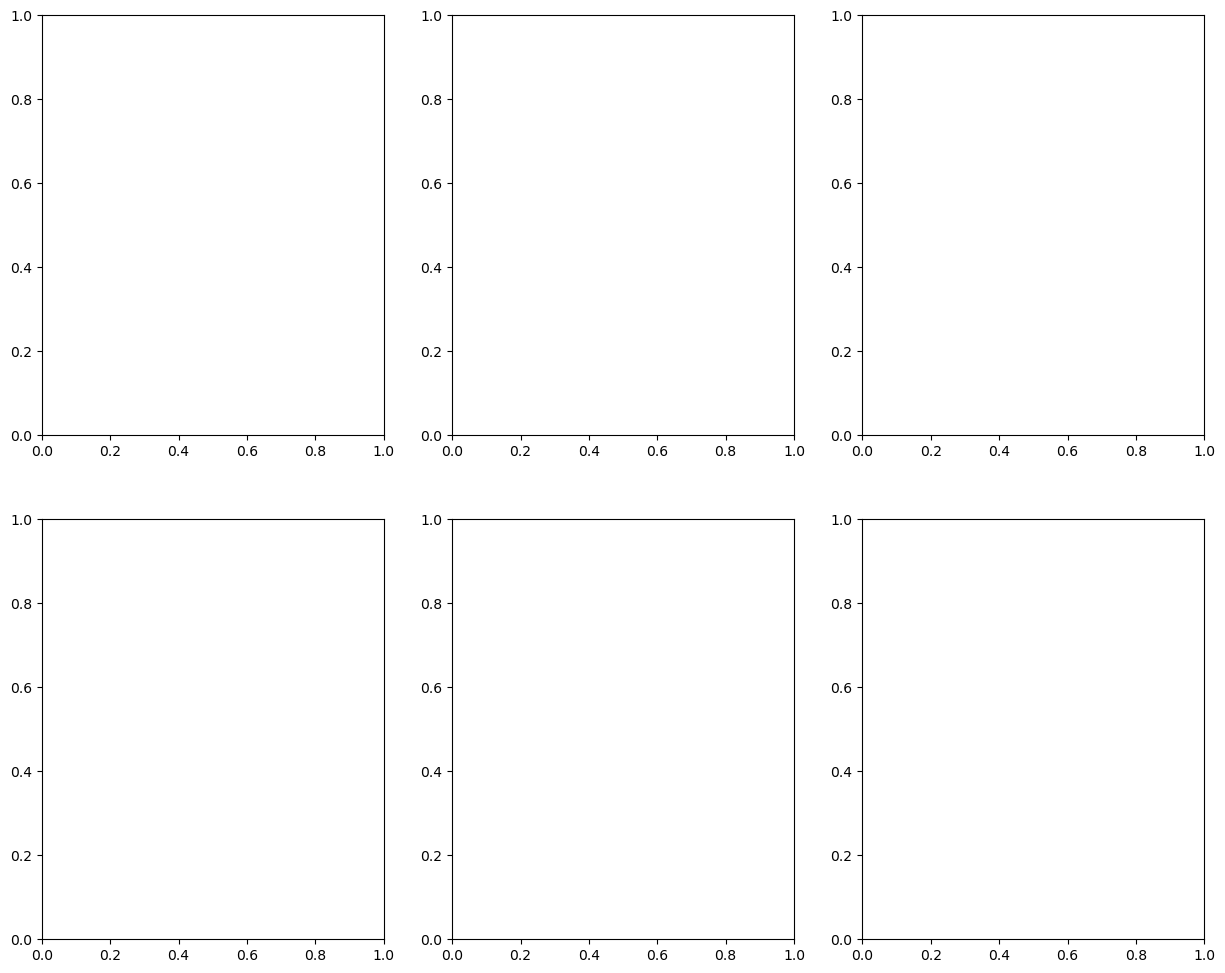

In [ ]:
# Create a grid of count plots for each categorical variable
fig, axes = plt.subplots(2, 3, figsize=(15, 12))  # 2x3 grid for 6 plots

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through categorical columns and create a count plot for each on the grid
for i, column in enumerate(categorical_features):
    sns.countplot(data=df, x=column, hue='churn', ax=axes[i])
    axes[i].set_title(f"Churn Distribution by {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")

# Adjust layout for clarity
plt.tight_layout()
plt.show()